<a href="https://colab.research.google.com/github/ts522/Machine-Learning-Final-Project----Smallwood--TreJon/blob/master/final_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:

import re
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from google.colab import files
files.upload
df = pd.read_csv('./vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [28]:
from seaborn.axisgrid import jointplot

vg = df.copy()

vg = vg.drop(columns = ['Rank'])
vgna = vg.copy()
vgeu = vg.copy()
vgjp = vg.copy()
vgos = vg.copy()

gp = vg.loc[vg['Global_Sales'] >= 1 ]

print(gp.groupby('Platform').count())
gp 



          Name  Year  Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  \
Platform                                                               
2600        26    23     26         26        26        26        26   
3DS         47    47     47         47        47        47        47   
DC           6     6      6          6         6         6         6   
DS         144   144    144        144       144       144       144   
GB          55    54     55         55        55        55        55   
GBA         70    69     70         69        70        70        70   
GC          46    46     46         46        46        46        46   
GEN         11    11     11         11        11        11        11   
N64         51    51     51         51        51        51        51   
NES         74    74     74         74        74        74        74   
PC          69    68     69         69        69        69        69   
PS         206   204    206        205       206       206      

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
2076,Wheel of Fortune,Wii,2010.0,Misc,THQ,0.89,0.04,0.00,0.06,1.00
2077,Disney Infinity,PS3,2013.0,Action,Disney Interactive Studios,0.48,0.35,0.00,0.16,1.00
2078,Dark Souls,X360,2011.0,Role-Playing,Namco Bandai Games,0.64,0.28,0.00,0.08,1.00
2079,Puzzler Collection,DS,2008.0,Puzzle,Ubisoft,0.17,0.78,0.00,0.04,1.00


In [42]:
gp.groupby(['Genre']).groups.keys()
gp['Platform'].value_counts()
gp['Genre'].value_counts()

Action          426
Sports          303
Shooter         252
Role-Playing    203
Platform        195
Racing          182
Misc            173
Fighting        124
Simulation       93
Puzzle           56
Adventure        42
Strategy         32
Name: Genre, dtype: int64

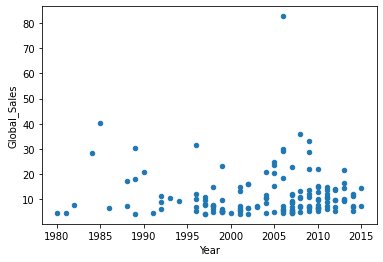

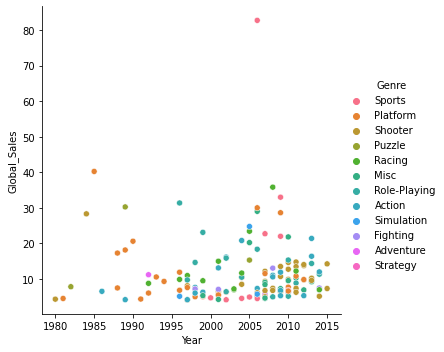

In [31]:
vgna = vgna.drop(columns = ['EU_Sales','JP_Sales','Other_Sales'])
vgna= vgna.loc[vgna['Global_Sales'] >= 1 ]
vgna= vgna.loc[vgna['NA_Sales'] >= 3 ]
vgna = vgna.sort_values(by= 'NA_Sales' , ascending=False)
vgna.plot.scatter(x='Year' , y= 'Global_Sales', rot=0)
sns.relplot(x= 'Year', y= 'Global_Sales', hue= 'Genre' , data=vgna);

In [ ]:
vgeu = vgeu.drop(columns = ['NA_Sales','JP_Sales','Other_Sales'])
vgeu= vgeu.loc[vgeu['Global_Sales'] >= 1 ]
vgeu 

In [ ]:
vgjp = vgjp.drop(columns = ['EU_Sales','NA_Sales','Other_Sales'])
vgjp = vgjp.loc[vgjp['Global_Sales'] >= 1 ]
vgjp

In [ ]:
#sns.relplot(x= 'Year', y= 'Global_Sales', hue= 'Genre' , data=vg);
ax = gp.plot.scatter(x='Year' , y= 'Global_Sales', rot=0)

In [ ]:
sns.relplot(x= 'Year', y= 'Global_Sales', hue= 'Genre' , data=vg);

In [ ]:

ax = sns.countplot(x='Platform', hue='Genre', data=gp)

# New Section


df['first_set'] = df['first_set'].replace(['Blue'],'Green')
.map( {'volvo':0 , 'bmw':1, 'audi':2} )


In [36]:
vg.groupby(
    ['Genre']
).agg({
        'EU_Sales': [min, max, sum],
        'JP_Sales': [min, max, sum],
        'Other_Sales': [min, max, sum],
        'NA_Sales': [min, max, sum],
}
)

EU_Sales                JP_Sales                Other_Sales  \
                  min    max     sum      min    max     sum         min   
Genre                                                                      
Action            0.0   9.27  525.00      0.0   3.96  159.95         0.0   
Adventure         0.0   2.79   64.13      0.0   2.69   52.07         0.0   
Fighting          0.0   2.61  101.32      0.0   2.87   87.35         0.0   
Misc              0.0   9.26  215.98      0.0   4.16  107.76         0.0   
Platform          0.0   9.23  201.63      0.0   6.81  130.77         0.0   
Puzzle            0.0   5.36   50.78      0.0   5.32   57.31         0.0   
Racing            0.0  12.88  238.39      0.0   4.13   56.69         0.0   
Role-Playing      0.0   8.89  188.06      0.0  10.22  352.31         0.0   
Shooter           0.0   5.88  313.27      0.0   1.44   38.28         0.0   
Simulation        0.0  11.00  113.38      0.0   5.33   63.70         0.0   
Sports            0.0  29.02  376.85      0.0   3.77  135.37         0.0   
Strategy          0.0   2.27   45.34      0.0   1.61   49.46         0.0   

                            NA_Sales                 
                max     sum      min    max     sum  
Genre                                                
Action        10.57  187.38      0.0   9.63  877.83  
Adventure      0.83   16.81      0.0   6.16  105.80  
Fighting       1.41   36.68      0.0   6.75  223.59  
Misc           2.85   75.32      0.0  14.97  410.24  
Platform       2.90   51.59      0.0  29.08  447.05  
Puzzle         1.18   12.55      0.0  23.20  123.78  
Racing         7.53   77.27      0.0  15.85  359.42  
Role-Playing   1.74   59.61      0.0  11.27  327.28  
Shooter        2.52  102.69      0.0  26.93  582.60  
Simulation     2.75   31.52      0.0   9.07  183.31  
Sports         8.46  134.97      0.0  41.49  683.35  
Strategy       0.59   11.36      0.0   3.18   68.70

In [48]:
mapping = {'Action':0,'Sports':1,'Shooter':2,'Role-Playing':3,'Platform':4,'Racing':5,'Misc':6,'Fighting':7,'Simulation':8, 'Puzzle':9, 'Adventure':10, 'Strategy':11}
gp = gp.applymap(lambda s: mapping.get(s) if s in mapping else s)

print(gp)
x_data = gp[['EU_Sales','JP_Sales' ,'NA_Sales' ,'Global_Sales']]
y_data = gp['Genre']

#y_data = y_data.apply(pd.to_numeric, errors='coerce')
#y_data = y_data.fillna(0, inplace=True)
print(y_data)




                          Name Platform    Year  Genre  \
0                   Wii Sports      Wii  2006.0      1   
1            Super Mario Bros.      NES  1985.0      4   
2               Mario Kart Wii      Wii  2008.0      5   
3            Wii Sports Resort      Wii  2009.0      1   
4     Pokemon Red/Pokemon Blue       GB  1996.0      3   
...                        ...      ...     ...    ...   
2076          Wheel of Fortune      Wii  2010.0      6   
2077           Disney Infinity      PS3  2013.0      0   
2078                Dark Souls     X360  2011.0      3   
2079        Puzzler Collection       DS  2008.0      9   
2080       Jampack Winter 2000       PS  2000.0      6   

                        Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0                        Nintendo     41.49     29.02      3.77         8.46   
1                        Nintendo     29.08      3.58      6.81         0.77   
2                        Nintendo     15.85     12.88      3.79

In [59]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data ,test_size = 0.1, shuffle=False)



In [60]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
linear_regression_model = linear_model.LinearRegression()
linear_regression_model.fit(x_train, y_train)
y_pred = linear_regression_model.predict(x_test)
print("Coefficients: \n", linear_regression_model.coef_)
print("Mean squared error: %.1f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.1f" % r2_score(y_test, y_pred ))

Coefficients: 
 [ 0.59244159  0.96874648  0.6303333  -0.61378441]
Mean squared error: 9.4
Coefficient of determination: 0.0


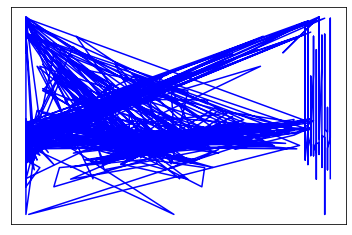

In [66]:
#plt.scatter(x_test , y_test, color="black")
plt.plot(x_test , y_pred, color="blue")

plt.xticks(())
plt.yticks(())

plt.show()

In [75]:
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(x_train, y_train)

n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)

stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)

for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 5 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 1] <= 0.20499999821186066 else to node 2.
	node=1 is a split node: go to node 3 if X[:, 0] <= 0.26500000059604645 else to node 4.
	node=2 is a leaf node.
		node=3 is a leaf node.
		node=4 is a leaf node.


In [98]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
model = KNeighborsClassifier()
model.fit(x_train, y_train)
yhat = model.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy * 100))
print('MAE: %.3f' % mae)

(208, 4) (1873, 4) (208,) (1873,)
Accuracy: 21.890
MAE: 3.341


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data ,test_size = 0.2, shuffle=False)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = KNeighborsClassifier()
model.fit(x_train, y_train)
yhat = model.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy * 100))
print('MAE: %.3f' % mae)

(1664, 4) (417, 4) (1664,) (417,)
Accuracy: 21.823
MAE: 3.189


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data ,test_size = 0.3, shuffle=False)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = KNeighborsClassifier()
model.fit(x_train, y_train)
yhat = model.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy * 100))
print('MAE: %.3f' % mae)

(1456, 4) (625, 4) (1456,) (625,)
Accuracy: 25.600
MAE: 3.088


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data ,test_size = 0.4, shuffle=False)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = KNeighborsClassifier()
model.fit(x_train, y_train)
yhat = model.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy * 100))
print('MAE: %.3f' % mae)

(1248, 4) (833, 4) (1248,) (833,)
Accuracy: 23.049
MAE: 2.893


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data ,test_size = 0.5, shuffle=False)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = KNeighborsClassifier()
model.fit(x_train, y_train)
yhat = model.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy * 100))
print('MAE: %.3f' % mae)

(1040, 4) (1041, 4) (1040,) (1041,)
Accuracy: 16.138
MAE: 2.829


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data ,test_size = 0.6, shuffle=False)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = KNeighborsClassifier()
model.fit(x_train, y_train)
yhat = model.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy * 100))
print('MAE: %.3f' % mae)

(832, 4) (1249, 4) (832,) (1249,)
Accuracy: 18.255
MAE: 2.946


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data ,test_size = 0.7, shuffle=False)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = KNeighborsClassifier()
model.fit(x_train, y_train)
yhat = model.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy * 100))
print('MAE: %.3f' % mae)

(624, 4) (1457, 4) (624,) (1457,)
Accuracy: 21.826
MAE: 3.005


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data ,test_size = 0.8, shuffle=False)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = KNeighborsClassifier()
model.fit(x_train, y_train)
yhat = model.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy * 100))
print('MAE: %.3f' % mae)

(416, 4) (1665, 4) (416,) (1665,)
Accuracy: 14.835
MAE: 3.339


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data ,test_size = 0.9, shuffle=False)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = KNeighborsClassifier()
model.fit(x_train, y_train)
yhat = model.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy * 100))
print('MAE: %.3f' % mae)

(208, 4) (1873, 4) (208,) (1873,)
Accuracy: 21.890
MAE: 3.341
